# SVM(Support Vector Machine)
1. In Machine Learning, SVM (Support Vector Machine) is a powerful supervised learning algorithm used for:

      1. Classification (main use)

      2. Regression (less common)

2. SVM tries to:

         1. Find the best boundary (hyperplane) that separates different classes in your data.

         2. It maximizes the margin between the classes — meaning it creates the widest possible gap between them.



## In SVM (Support Vector Classification - SVC),
1. the cost function measures how well the model is separating the classes while maintaining a large margin.

## Prectical Implemantaion 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [25]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [27]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [31]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

### sepal length vs sepal width(Setosa vs Versicolor)

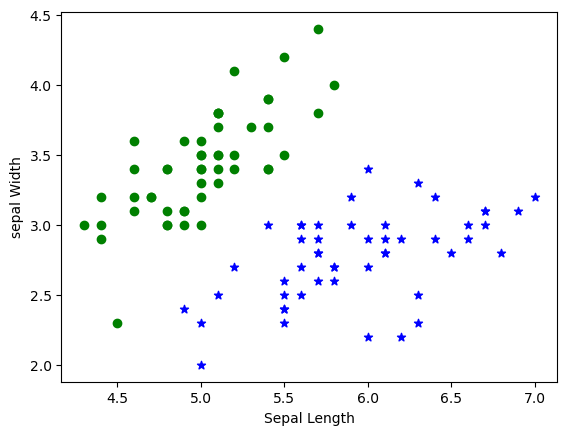

In [34]:
plt.xlabel('Sepal Length')
plt.ylabel('sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'g', marker = 'o')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'b', marker = '*')
plt.show()

### petal length vs petal width(Setosa vs versicolor)

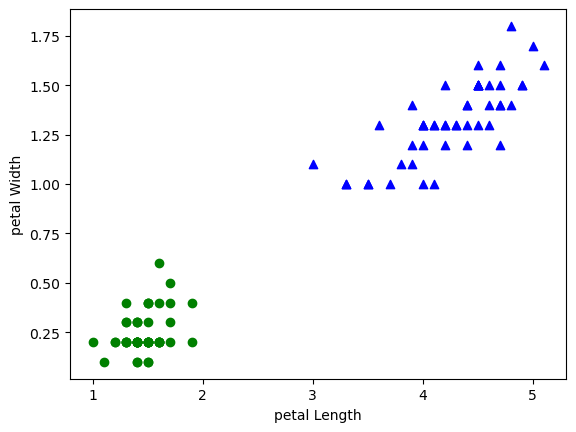

In [37]:
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g', marker = 'o')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'b', marker = '^')
plt.show()

In [39]:
# Now Create Indepndent feature x and Dependent feature y

x = df.drop(['target', 'flower_name'], axis = 'columns')
y = df.target

In [41]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [45]:
# Now Split data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [47]:
len(X_train)

120

In [49]:
len(X_test)

30

In [51]:
# Now Train Model Using SVC 
from sklearn.svm import SVC
model = SVC()



In [53]:
model.fit(X_train,Y_train)

SVC()

In [55]:
model.score(X_test,Y_test)

0.8333333333333334

In [57]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\VIKRAM\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

### Tune Parameters


#### 1. Regularization (C)

In [61]:
model_C = SVC(C = 1)
model_C.fit(X_train, Y_train)
model_C.score(X_test,Y_test)

0.8333333333333334

In [63]:
model_C = SVC(C = 0.2)
model_C.fit(X_train, Y_train)
model_C.score(X_test,Y_test)

0.8

#### 2. Gamma 

In [66]:
model_g = SVC(gamma = 10)
model_g.fit(X_train, Y_train)
model_g.score(X_test,Y_test)

0.8666666666666667

In [68]:
model_g = SVC(C = 10, gamma = 10)
model_g.fit(X_train, Y_train)
model_g.score(X_test,Y_test)

0.9

#### 3. Kernel

In [71]:
model_linear_kernal = SVC(kernel = 'linear')
model_linear_kernal.fit(X_train, Y_train)
model_linear_kernal.score(X_test,Y_test)

0.8666666666666667

In [73]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[9, 0, 0],
       [0, 8, 1],
       [0, 4, 8]], dtype=int64)